In [1]:
%matplotlib inline
'''
Artificial Intelligence and Expert Systems
Name: Shiv Shankar Sukumaran
Roll No: 14CO244
'''

import keras
from keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense, Activation, Input
from keras.models import Model, Sequential
from keras.layers import BatchNormalization, Lambda, UpSampling2D, Concatenate, Reshape, Add
from keras.utils import to_categorical, np_utils
import tensorflow as tf
import cv2
import scipy.io as scio
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import re

from numpy import unravel_index
from scipy import ndimage, misc
from operator import sub
from keras import backend as K
from keras import regularizers, optimizers
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint

def atoi(text) : 
    return int(text) if text.isdigit() else text

def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


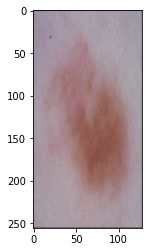

In [2]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("../Melanoma/melanoma/"):
    filenames.sort(key = natural_keys)
    rootpath = root
melanoma_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    image = misc.imresize(image,(256,128))
    melanoma_images.append(image)
plt.imshow(melanoma_images[4])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


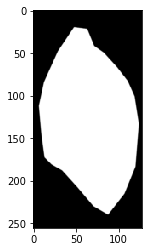

In [3]:
root = "../Ground_truth/gt/"
ground_truth_images_melanoma = []
for filename in filenames :
    filename = filename[0:-4] + "_segmentation.png"
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = 'L')
    image = misc.imresize(image,(256,128))
    ground_truth_images_melanoma.append(image)
plt.imshow(ground_truth_images_melanoma[4], cmap = "gray")

In [4]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("../Ground_truth/gt/"):
    filenames.sort(key = natural_keys)
    rootpath = root
ground_truth_images_melanoma = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = 'L')
    image = misc.imresize(image,(256,128))
    ret,image = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    ground_truth_images_melanoma.append(image)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [5]:
for i in range(len(ground_truth_images_melanoma)) :
    misc.imsave('../Ground_truth/gt_resized/'+filenames[i],ground_truth_images_melanoma[i])
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("../Melanoma/melanoma/"):
    filenames.sort(key = natural_keys)
    rootpath = root
for i in range(len(melanoma_images)):
    misc.imsave("../Melanoma/melanoma_resized/" + filenames[i], melanoma_images[i])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if __name__ == '__main__':


In [6]:
gt = np.array(ground_truth_images_melanoma)
gt = gt/255

root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("../Others/others/"):
    filenames.sort(key = natural_keys)
    rootpath = root
other_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    image = misc.imresize(image,(256,128))
    other_images.append(image)
for i in range(len(other_images)):
    misc.imsave("../Others/others_resized/" + filenames[i], other_images[i])
np.save("ground_truth_resized.npy", gt)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


In [12]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("../total_images"):
    filenames.sort(key = natural_keys)
    rootpath = root
total_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    total_images.append(image)
total_images = np.array(total_images)
np.save("total_images.npy",total_images)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':


In [13]:
x = np.load('total_images.npy')
y = np.load('ground_truth_resized.npy')
train_indices = np.random.choice(936,736,replace = False)
x_train_images = []
y_train_labels = [] 
for i in train_indices:
    x_train_images.append(x[i])
    y_train_labels.append(y[i])

test_indices = [xy for xy in range(936) if xy not in train_indices]
x_test_images = []
y_test_labels = []

for i in test_indices:
    x_test_images.append(x[i])
    y_test_labels.append(y[i])
x_train = np.array(x_train_images)
x_test = np.array(x_test_images)
y_train = np.array(y_train_labels)
y_test = np.array(y_test_labels)

In [14]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
np.save("x_train2.npy",x_train)
np.save("x_test2.npy", x_test)
np.save("y_train2.npy",y_train)
np.save("y_test2,npy", y_test)

In [15]:
x_train = np.load('x_train2.npy')
x_test = np.load('x_test2.npy')
y_train = np.load('y_train2.npy')
y_test = np.load('y_test2,npy.npy')
rows = 256
cols = 128
data_shape = 216*64
weight_decay = 0.0001

# Defines the input tensor
inputs = Input(shape=(None,None,3))

L1 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(inputs)
L2 = BatchNormalization()(L1)
L2 = Activation('relu')(L2)
#L3 = Lambda(maxpool_1,output_shape = shape)(L2)
L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(128,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L3)
L5 = BatchNormalization()(L4)
L5 = Activation('relu')(L5)
#L6 = Lambda(maxpool_2,output_shape = shape)(L5)
L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(128,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L6)
L8 = BatchNormalization()(L7)
L9 = Activation('relu')(L8)
L10 = Conv2D(128,(3,3),dilation_rate= (2,2), padding = "same", activation='relu', name = "conv_dil_1")(L9)
L11 = BatchNormalization()(L10)
L12 = Activation('relu')(L11)
L13 = Conv2D(128,(3,3),dilation_rate= (4,4), padding = "same", activation='relu', name = "conv_dil_2")(L12)
L14 = BatchNormalization()(L13)
L15 = Activation('relu')(L14)
L16 = Conv2D(128,(3,3),dilation_rate= (8,8), padding = "same", activation='relu', name = "conv_dil_3")(L15)
L17 = BatchNormalization()(L16)
L18 = Activation('relu')(L17)
L19 = Conv2D(128,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay),
             name="skip_conv_1")(L6)
L20 = Add()([L18,L19])
L21 = UpSampling2D( size = (2,2)) (L20)
#L21 = Deconvolution2D(128, kernel_size = (3,3), strides = (2,2), activation = "relu", 
 #                     name = "ct_deconv_1", padding = "same")(L20)
L21 = Conv2D(128,(3,3), padding = "same", kernel_regularizer=regularizers.l2(weight_decay))(L21)
L22 = BatchNormalization()(L21)
L23 = Activation('relu')(L22)
L24 = Conv2D(128,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay),
             name="skip_conv_2")(L3)
L24 = Add()([L23,L24])
L25 = UpSampling2D(size = (2,2))(L24)
L25 = Conv2D(64, (3,3), padding = "same", kernel_regularizer=regularizers.l2(weight_decay))(L25)
#L25 = Deconvolution2D(64, kernel_size = (3,3), strides = (2,2), activation = "relu", 
 #                     name = "ct_deconv_2", padding = "same")(L24)
#L25 = 
L26 = BatchNormalization()(L25)
L27 = Activation('relu')(L26)
L28 = Conv2D(1,kernel_size=(1,1),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L27)#

L30 = Activation('sigmoid')(L28)
model = Model(inputs = inputs, outputs = L30)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 6 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 6 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [16]:
y_train = y_train.reshape(y_train.shape[0],256,128,1)
y_test = y_test.reshape(y_test.shape[0],256,128,1)
smooth = 1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
def customized_loss(y_true,y_pred):
    return (1*K.binary_crossentropy(y_true, y_pred))+(0.5*dice_coef_loss(y_true, y_pred))

optimiser = optimizers.Adam(lr = 0.01)
model.compile(optimizer=optimiser,loss=dice_coef_loss,metrics=['accuracy',dice_coef])

lr_reducer = ReduceLROnPlateau(factor=0.5, cooldown=0, patience=6, min_lr=0.5e-6)
csv_logger = CSVLogger('segmentation_lr_e2_bs4.csv')
model_chekpoint = ModelCheckpoint("segmentation_lr_e2_bs4.hdf5",monitor = 'val_loss',verbose = 1,save_best_only=True)

In [21]:
model.fit(x_train,y_train,batch_size=32,epochs=25,validation_data=(x_test, y_test),callbacks=[lr_reducer, csv_logger,model_chekpoint])

Train on 736 samples, validate on 200 samples
Epoch 1/25
736/736 [==============================] - 473s 643ms/step - loss: -0.7686 - acc: 0.8965 - dice_coef: 0.7930 - val_loss: -0.4754 - val_acc: 0.8283 - val_dice_coef: 0.5020

Epoch 00001: val_loss did not improve
Epoch 2/25
736/736 [==============================] - 481s 654ms/step - loss: -0.7711 - acc: 0.9005 - dice_coef: 0.8005 - val_loss: -0.5499 - val_acc: 0.8558 - val_dice_coef: 0.5776

Epoch 00002: val_loss did not improve
Epoch 3/25
736/736 [==============================] - 486s 660ms/step - loss: -0.7501 - acc: 0.8896 - dice_coef: 0.7793 - val_loss: -0.0017 - val_acc: 0.7436 - val_dice_coef: 0.0412

Epoch 00003: val_loss did not improve
Epoch 4/25
736/736 [==============================] - 474s 643ms/step - loss: -0.7548 - acc: 0.9004 - dice_coef: 0.8004 - val_loss: -0.6018 - val_acc: 0.8690 - val_dice_coef: 0.6464

Epoch 00004: val_loss improved from -0.57524 to -0.60176, saving model to segmentation_lr_e2_bs4.hdf5
Epoch 